Importing the dependenics

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

**Import Data**

In [2]:
df = pd.read_csv('/kaggle/input/sonar-data/sonar data.csv', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

#  M --> Mine

# R --> Rock

In [7]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

# Data visualization

<Axes: >

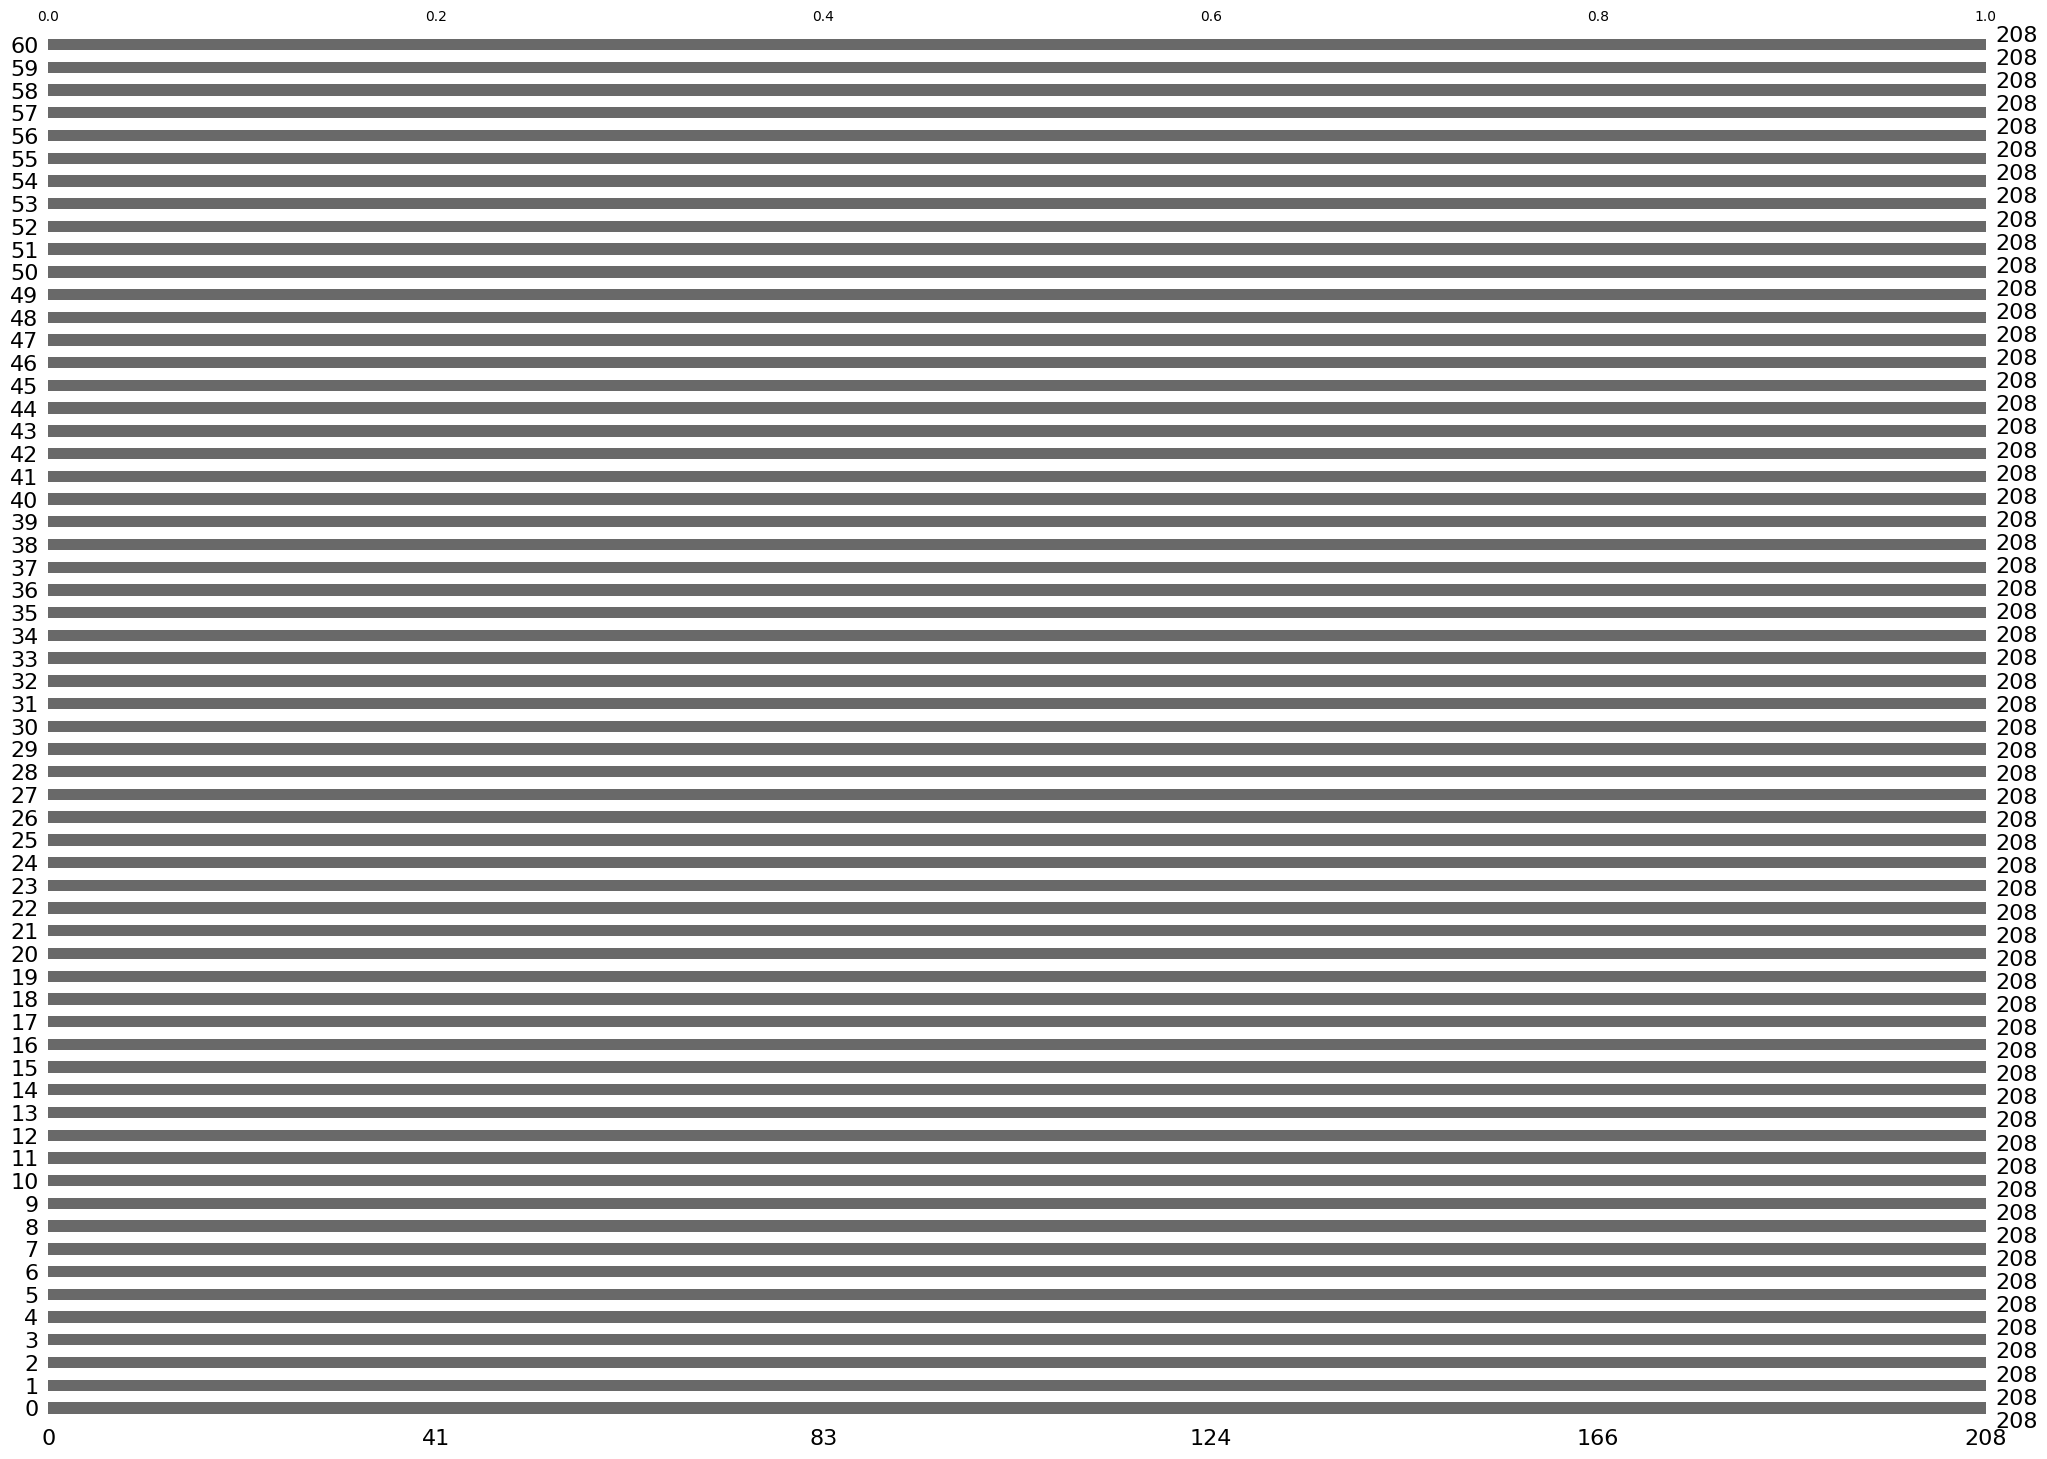

In [9]:
#visualize missing values with missingno library
msno.bar(df)

In [10]:
#check correlation
# Convert categorical variable into dummy/indicator variables
df_encoded = pd.get_dummies(df)

# Now calculate the correlation
df_encoded.corr()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60_M,60_R
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694,-0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238,-0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195,-0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638,-0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232,-0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191,-0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826,-0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055,-0.090055
60_M,0.271694,0.231238,0.192195,0.250638,0.222232,0.132327,0.114748,0.189314,0.321448,0.341142,...,0.141871,0.182687,0.095639,0.129341,0.000933,0.184191,0.130826,0.090055,1.000000,-1.000000


In [11]:
#check skewness
df_encoded.skew()

#print skewness
print("Skewness for each column: ")
for col in df_encoded.columns:
    print(col , df_encoded[col].skew())

Skewness for each column: 
0 2.131088403617926
1 2.1556436669002843
2 2.6525178027721217
3 3.4016974370591413
4 2.018140508448359
5 1.2481657456456894
6 0.9708203074544368
7 1.481106640375856
8 1.633869913128784
9 1.2812584154071607
10 0.9878128779952564
11 0.5886807806025756
12 0.7365842949556032
13 1.0223691685249507
14 0.7639643127441457
15 0.6946708068184217
16 0.654479991296588
17 0.525845114066359
18 0.2831823484291814
19 -0.085331383601653
20 -0.25274121701340857
21 -0.3922894149936129
22 -0.5943498637949092
23 -0.6918610071124024
24 -0.7889086971703941
25 -0.6715801459985935
26 -0.6278429273258317
27 -0.615446598240834
28 -0.4420069524297418
29 -0.13238978896414622
30 0.2597970958332025
31 0.31341978888919503
32 0.4238637096765939
33 0.5632955277781287
34 0.5916537771446705
35 0.6198678663567869
36 0.6769940604462361
37 1.0333664958915112
38 0.908835142088458
39 0.861279683655796
40 0.8635260724515669
41 0.8601098037577957
42 0.9093169683561569
43 1.235086246369272
44 1.3668390

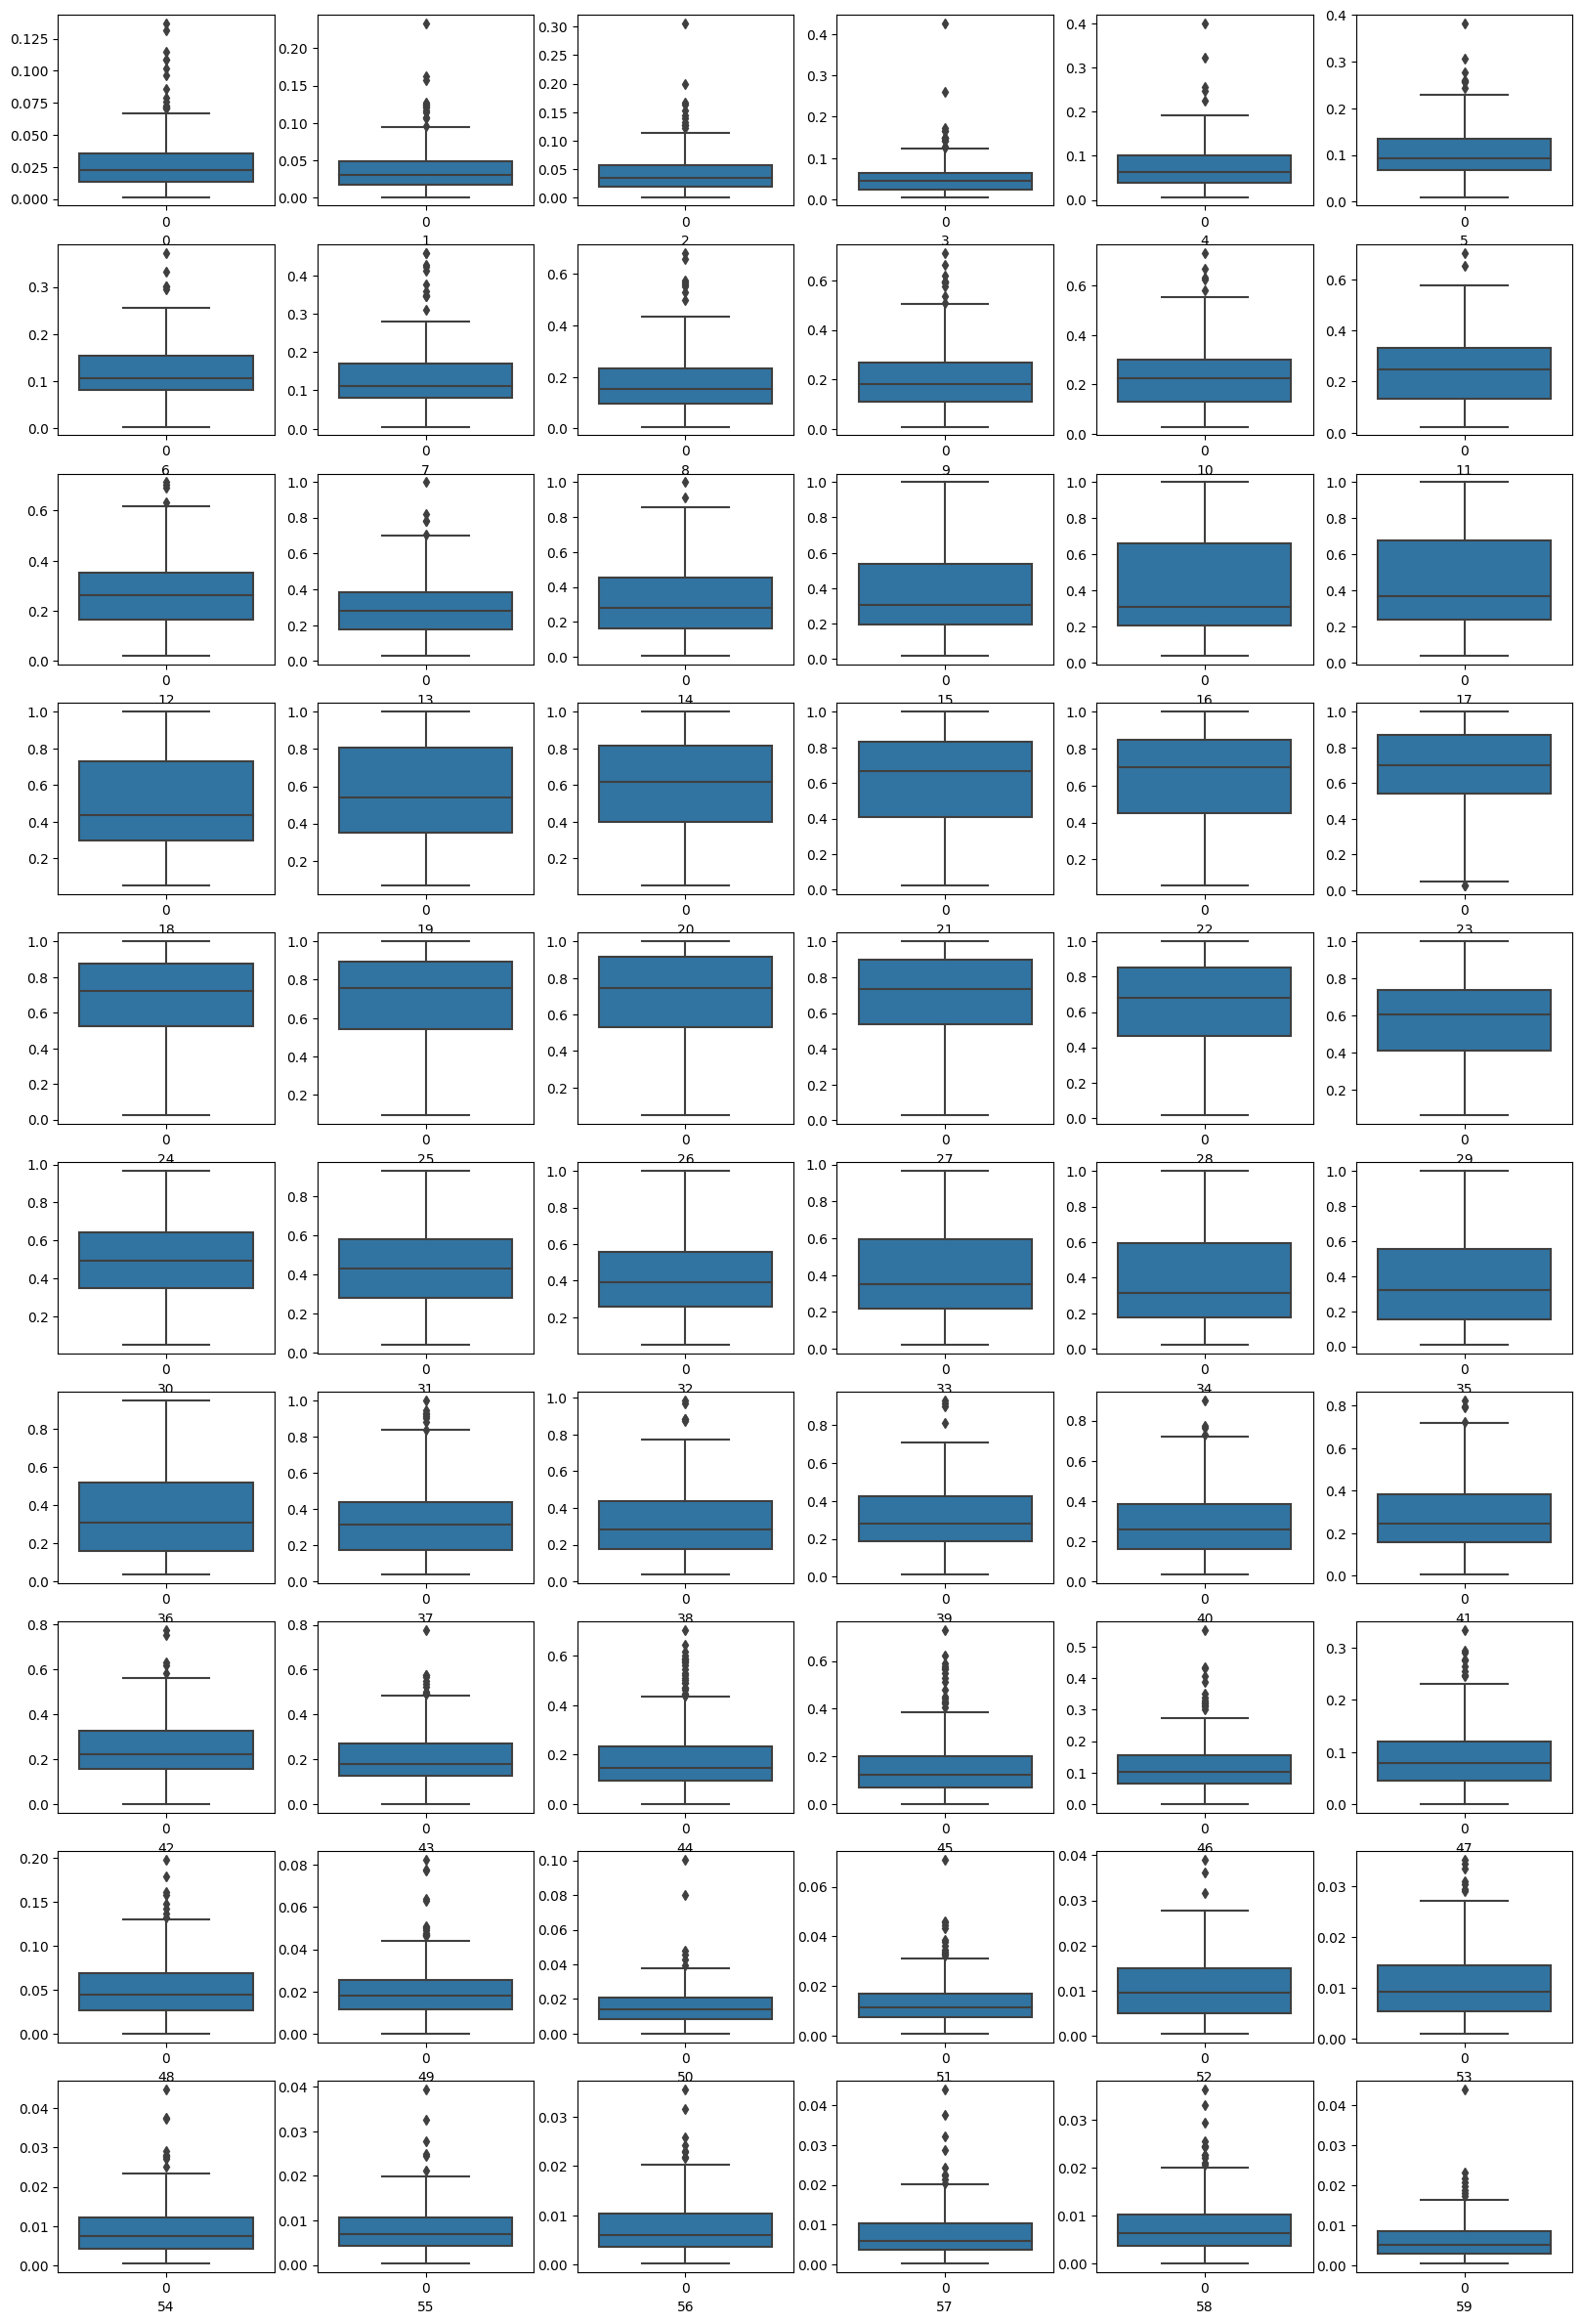

In [12]:
#visualize boxplot for each column to check outliers
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in df_encoded:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.boxplot(df_encoded[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

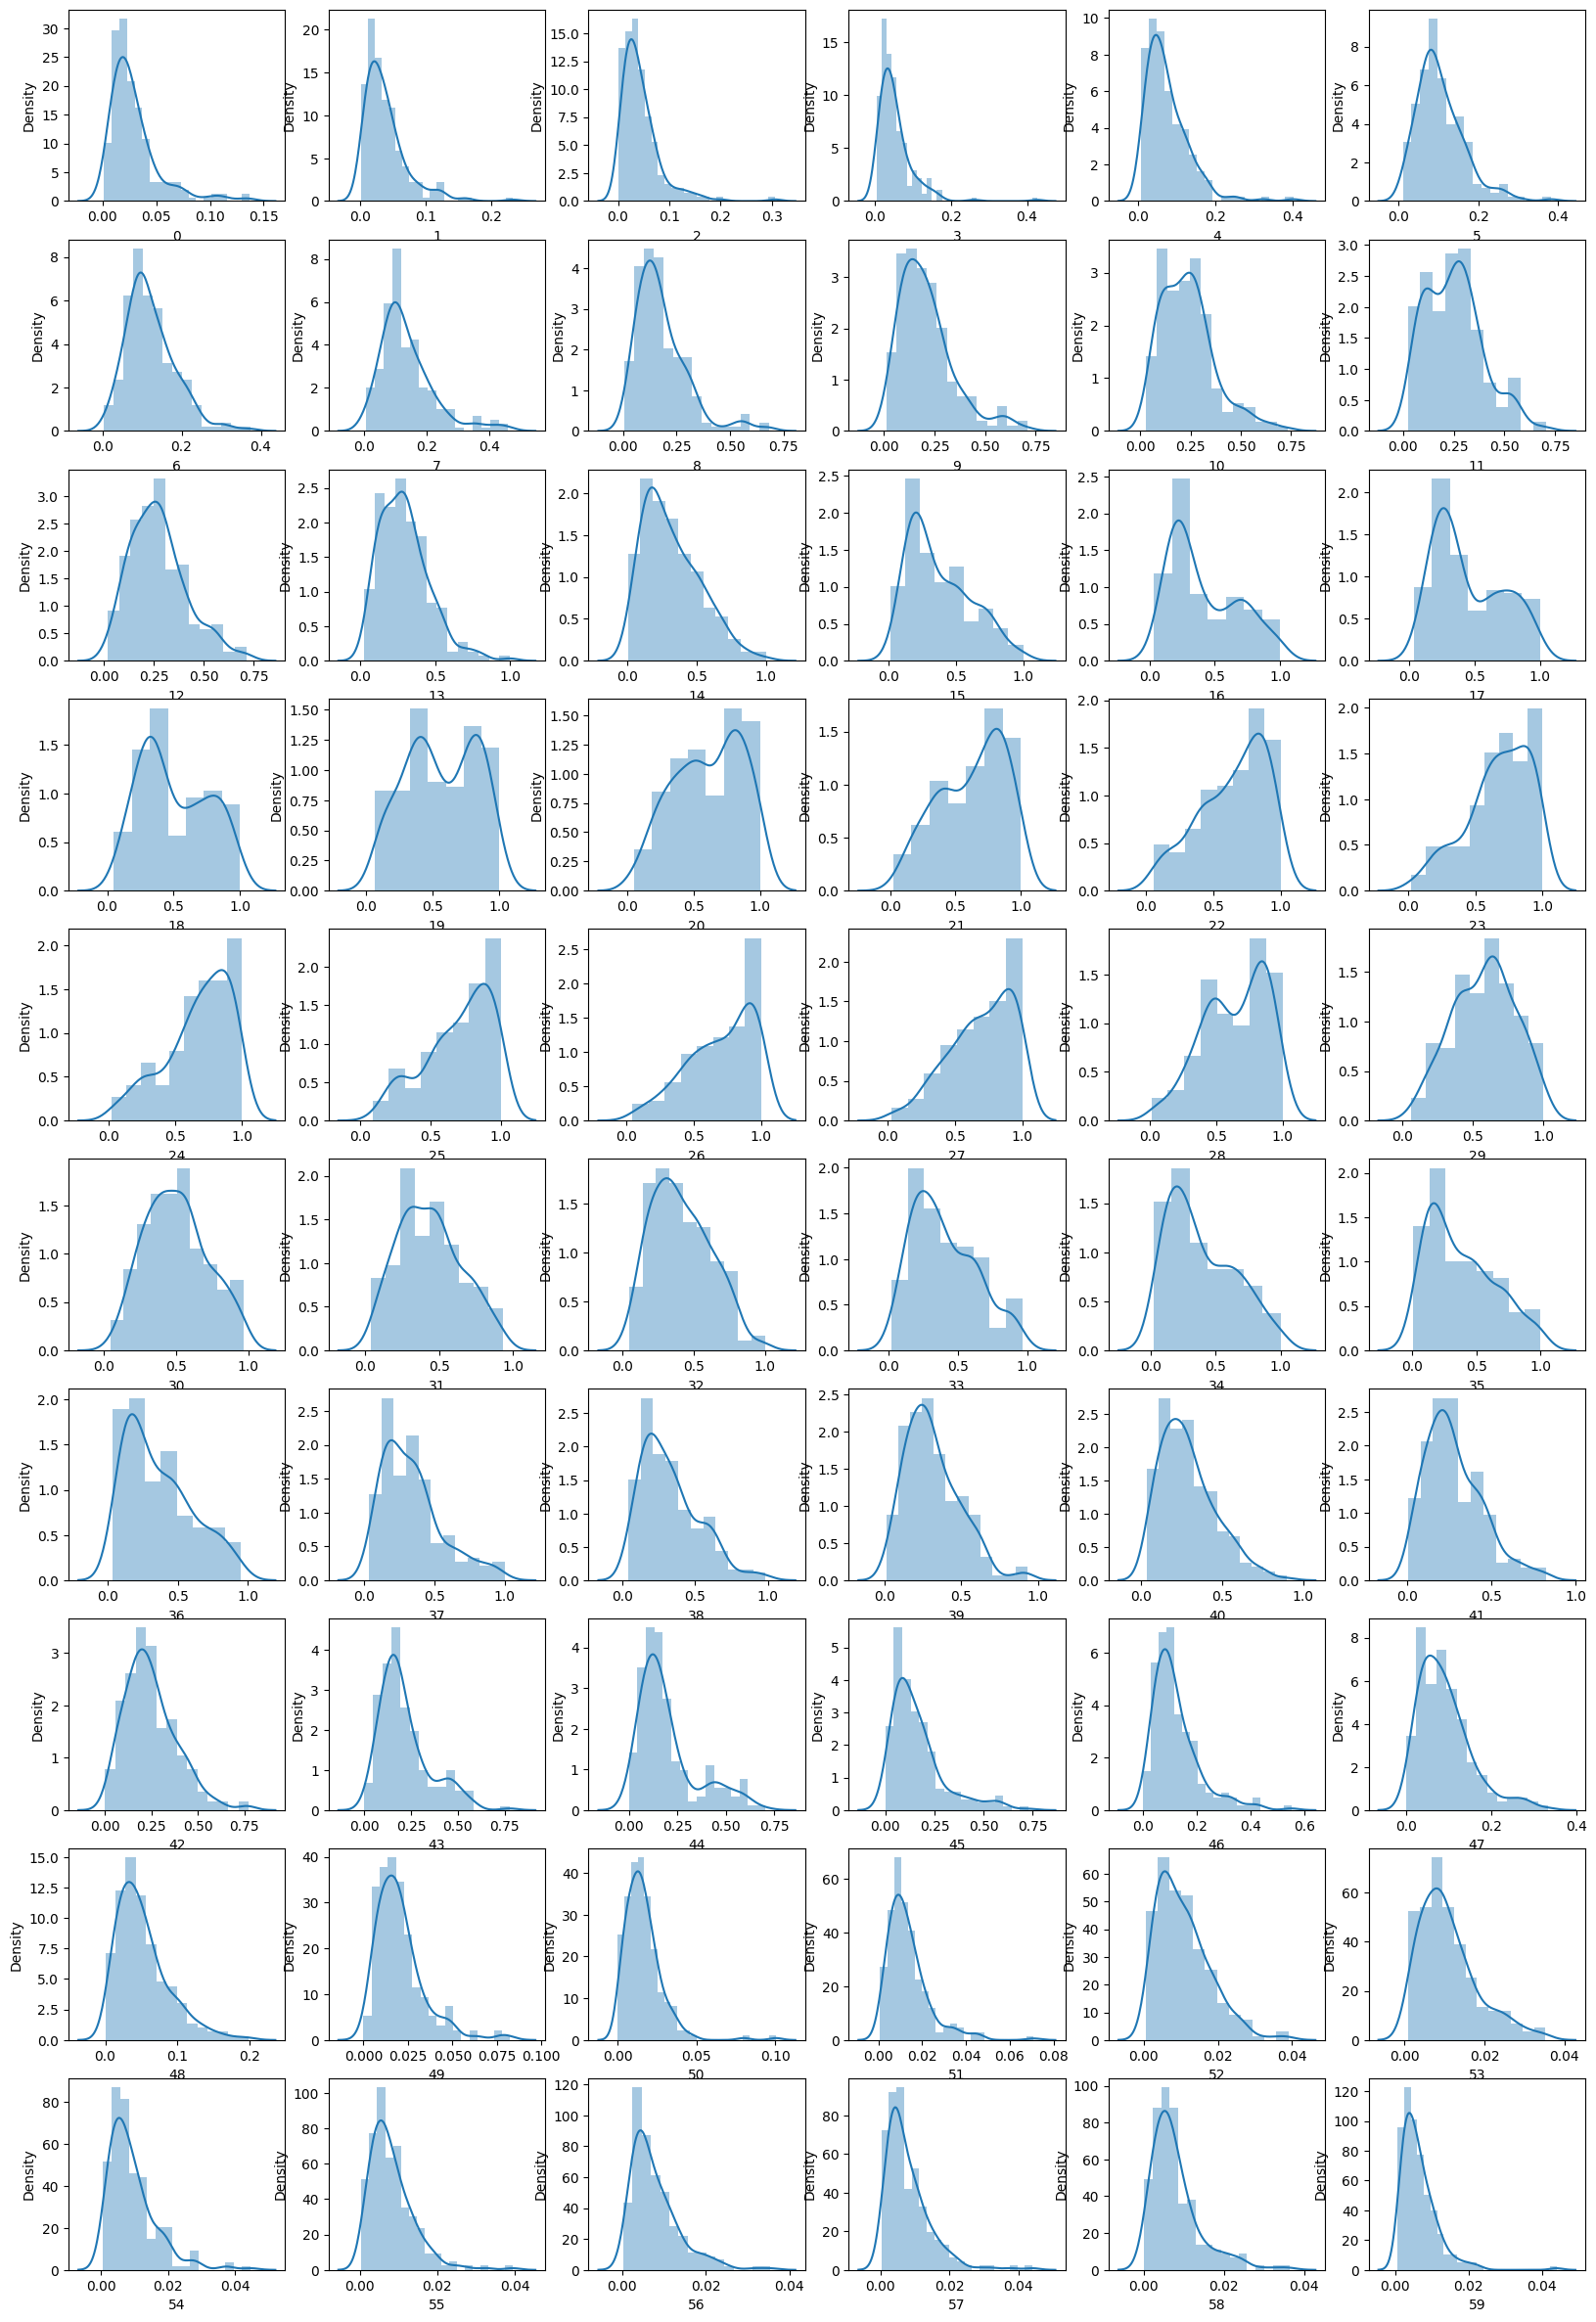

In [13]:
#visualize distplot for each column to figure out distribution
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in df_encoded:
    if plotnumber<=60:
        ax=plt.subplot(10,6,plotnumber)
        sns.distplot(df_encoded[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1

# Data Preprocessing

seperate features from target

In [14]:
features = df.drop(columns =60)
target = df[60]

In [15]:
features.shape

(208, 60)

In [16]:
target.shape

(208,)

In [17]:
pd.DataFrame(features).head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [18]:
target

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

scale Data

In [19]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

visualization displot for each cilumns to finger out distribution

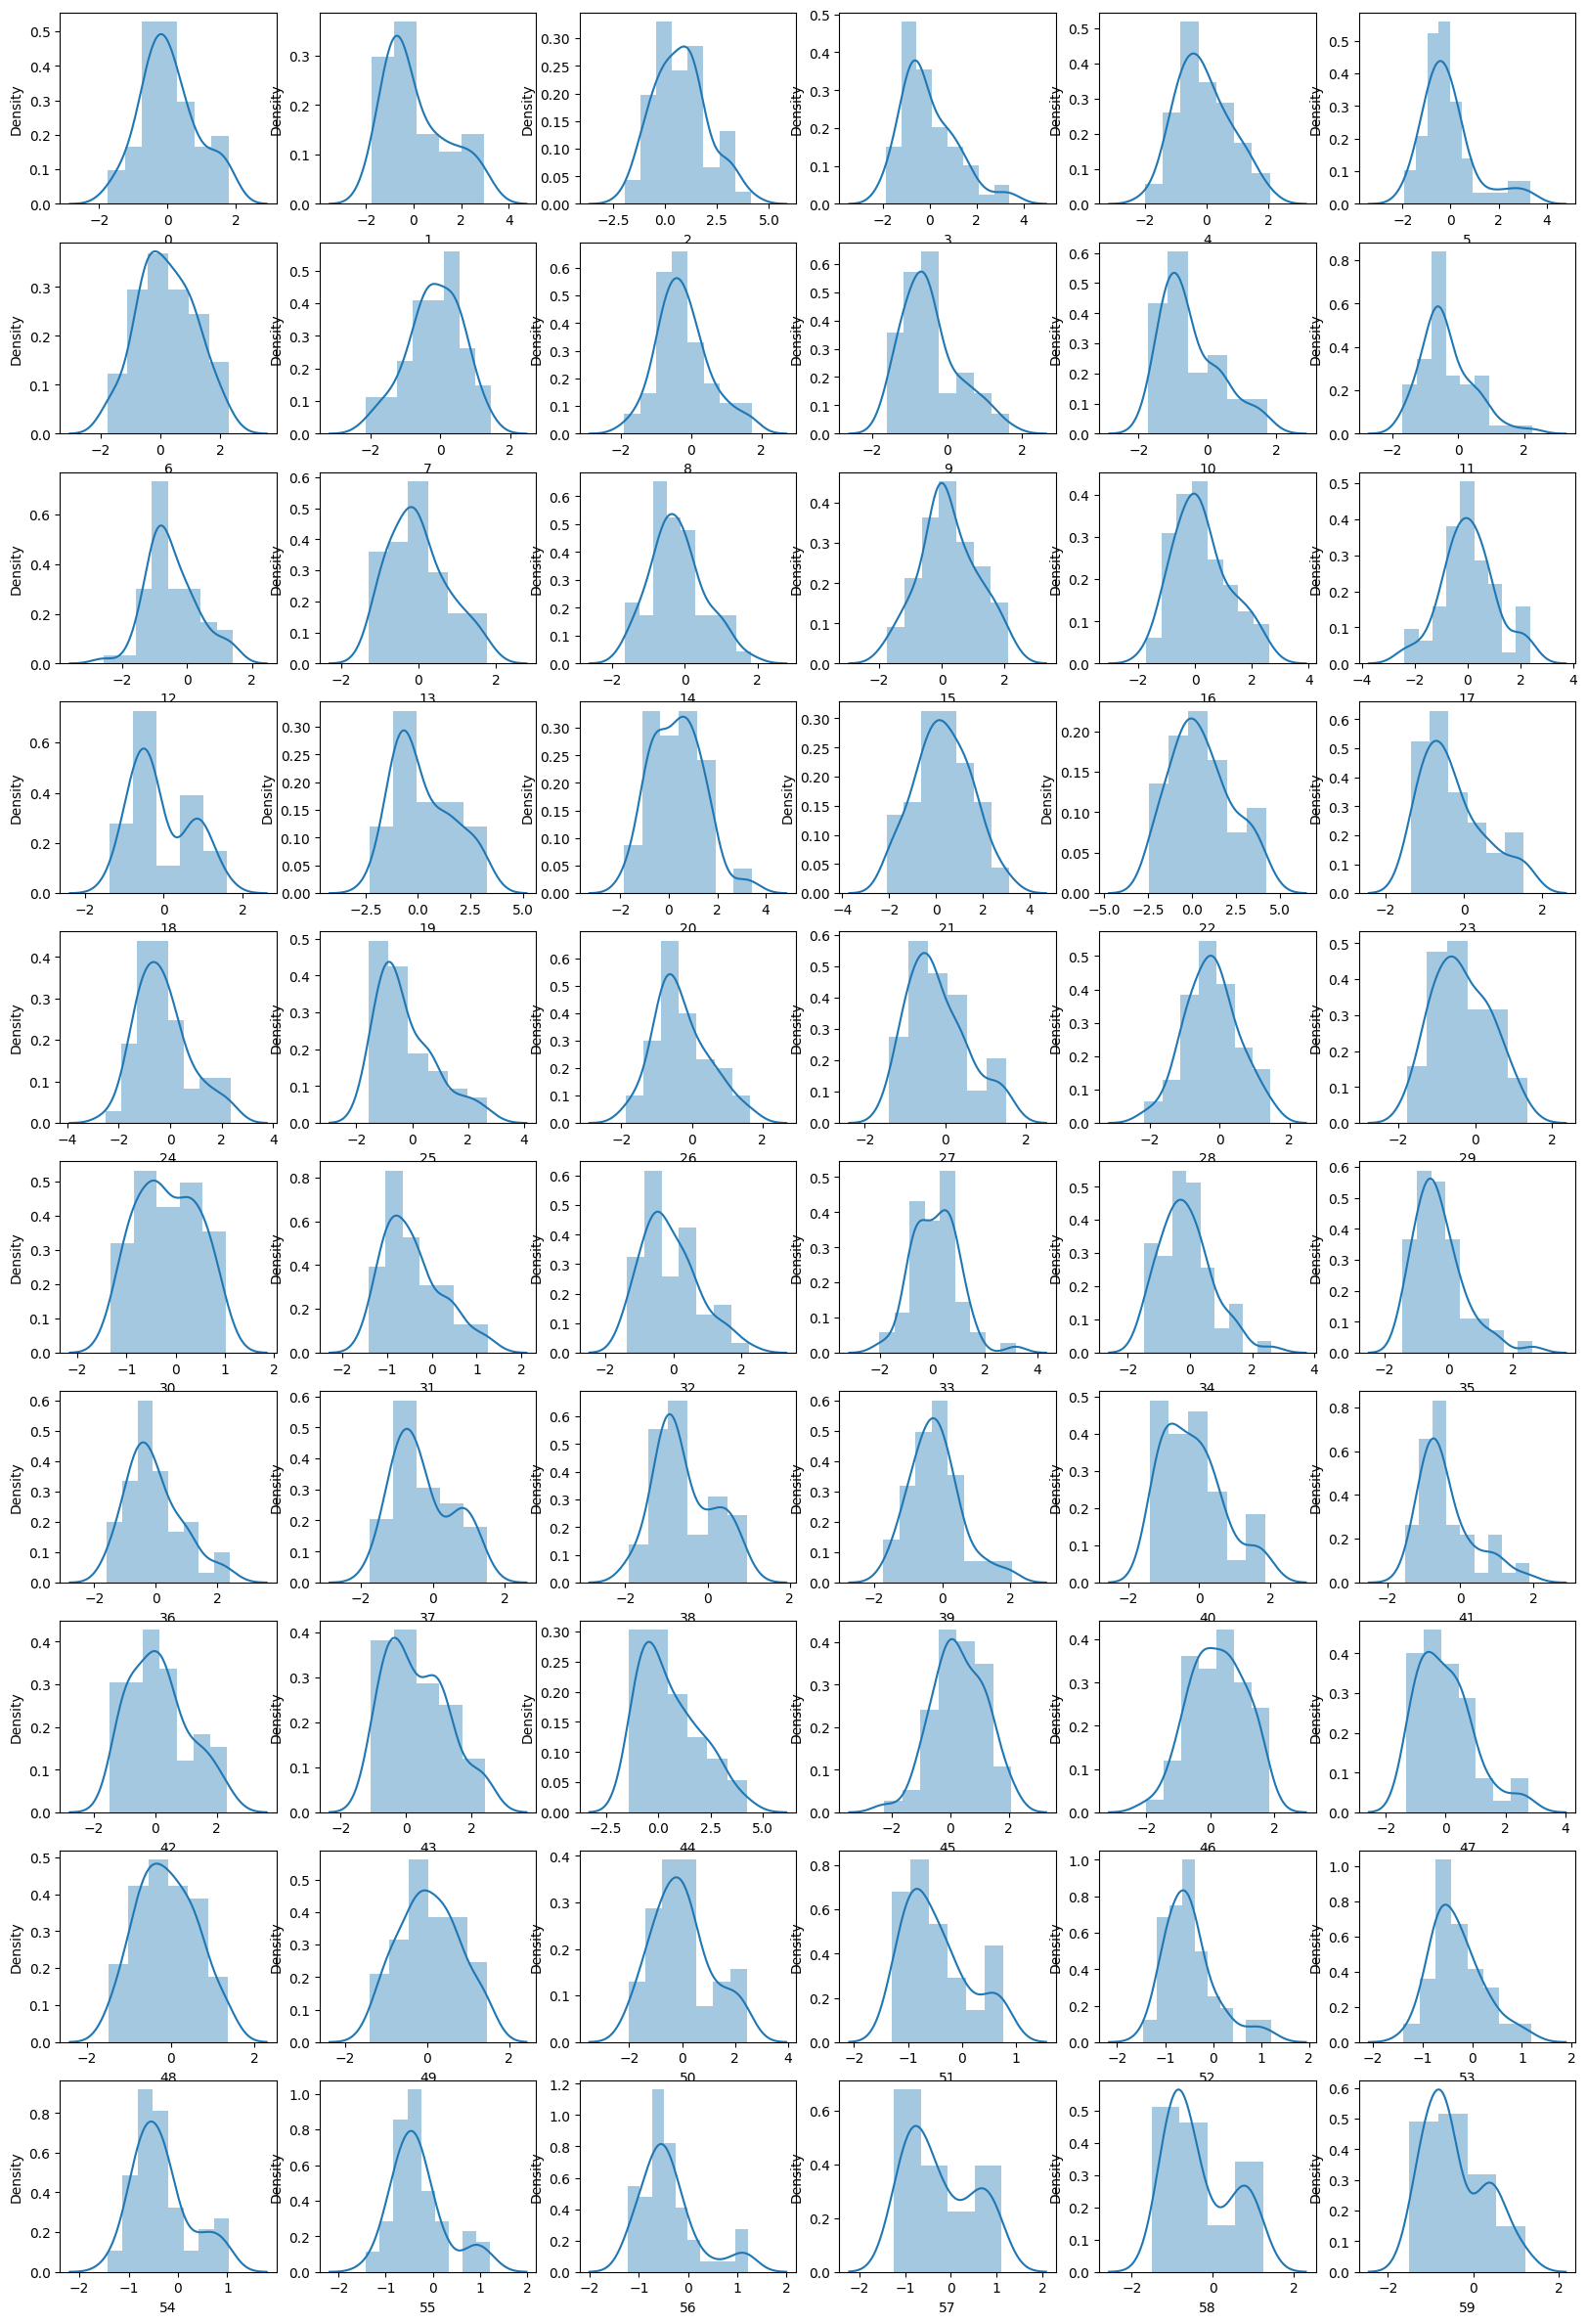

In [20]:
plt.figure(figsize=(20,30), facecolor ='white')
plotnumber = 1

for column in pd.DataFrame(features):
    if plotnumber <=60:
        ax = plt.subplot(10, 6, plotnumber)
        sns.distplot(features[column])
        plt.xlabel(column, fontsize = 10)
    plotnumber +=1


# model Build

split data into train & test

In [21]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state = 42) 

In [22]:
x_train.shape

(156, 60)

**Build model with SVC**

In [23]:
from sklearn.svm import SVC
svc = SVC(C = 10, kernel = 'rbf')
svc.fit(x_train, y_train)

SVC(C=10)

In [24]:
#train score
print(f"Training Score is : ", svc.score(x_train, y_train))

print(f"Testing Score is : ", svc.score(x_test, y_test))

Training Score is :  1.0
Testing Score is :  0.9615384615384616


In [25]:
#make prediction on test data
y_pred = svc.predict(x_test)

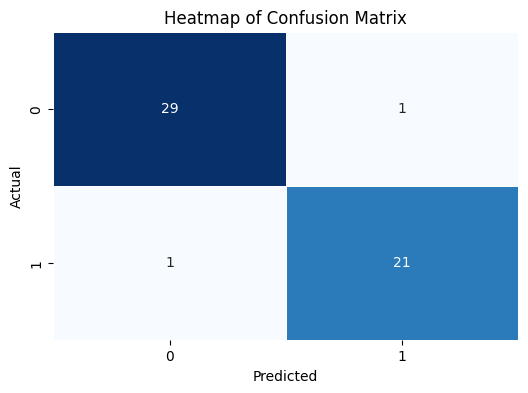

In [26]:
#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           M       0.97      0.97      0.97        30
           R       0.95      0.95      0.95        22

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



In [28]:
#Build model with KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric ='euclidean', n_neighbors= 3, weights= 'uniform')
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [29]:
# Train Score
print(f"Training Score is :" ,knn.score(x_train, y_train))

# Test Score
print(f"Testing Score is :" ,knn.score(x_test, y_test))

Training Score is : 0.9423076923076923
Testing Score is : 0.9230769230769231


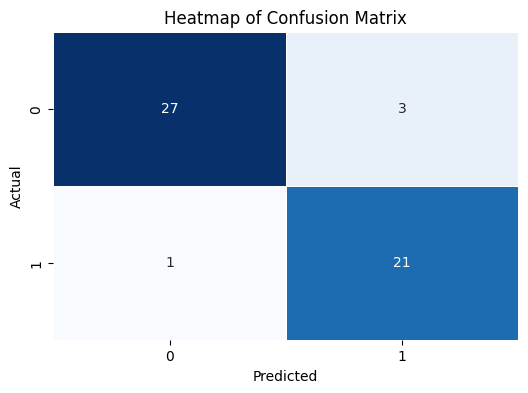

In [30]:
#make prediction on test data
y_pred = knn.predict(x_test)

#evaluate the model
# Print the confusion matrix, classification report
conf_matrix =confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.title('Heatmap of Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           M       0.96      0.90      0.93        30
           R       0.88      0.95      0.91        22

    accuracy                           0.92        52
   macro avg       0.92      0.93      0.92        52
weighted avg       0.93      0.92      0.92        52



# Make predictive system for SVC

In [32]:
input_data = (0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.066,0.2273,0.31,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.555,0.6711,0.6415,0.7104,0.808,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.051,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032)

#changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = svc.predict(std_data)
print(prediction)

if (prediction[0]=='M'):
  print('The object is a Mine')
else:
  print('The object is a Rock')

['R']
The object is a Rock


**Make predictive system for SVC**

In [33]:
input_data = (0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,0.3877,0.4992,0.4981,0.4972,0.5607,0.7339,0.8230,0.9173,0.9975,0.9911,0.8240,0.6498,0.5980,0.4862,0.3150,0.1543,0.0989,0.0284,0.1008,0.2636,0.2694,0.2930,0.2925,0.3998,0.3660,0.3172,0.4609,0.4374,0.1820,0.3376,0.6202,0.4448,0.1863,0.1420,0.0589,0.0576,0.0672,0.0269,0.0245,0.0190,0.0063,0.0321,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055)

#changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = svc.predict(std_data)
print(prediction)

if (prediction[0]=='M'):
  print('The object is a Mine')
else:
  print('The object is a Rock')

['M']
The object is a Mine
